## Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
data = pd.read_csv('downloads/gas_turbines.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.shape

(15039, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [6]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


<AxesSubplot:>

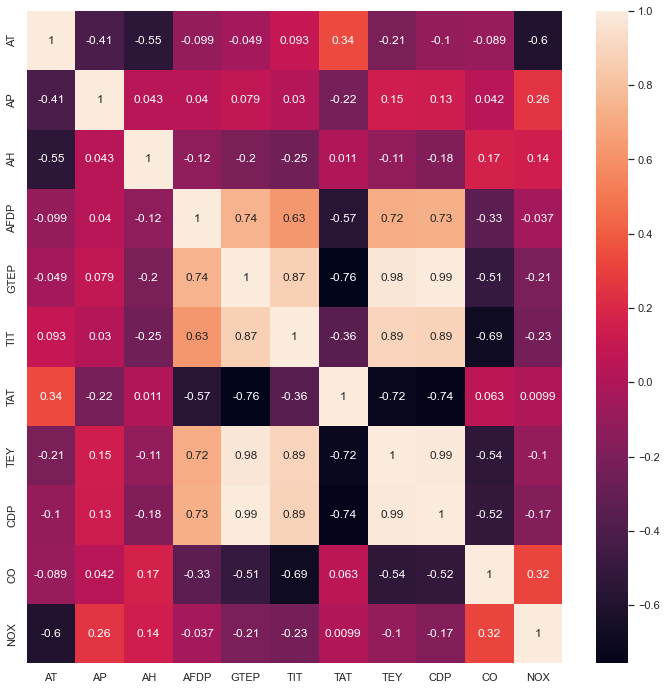

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

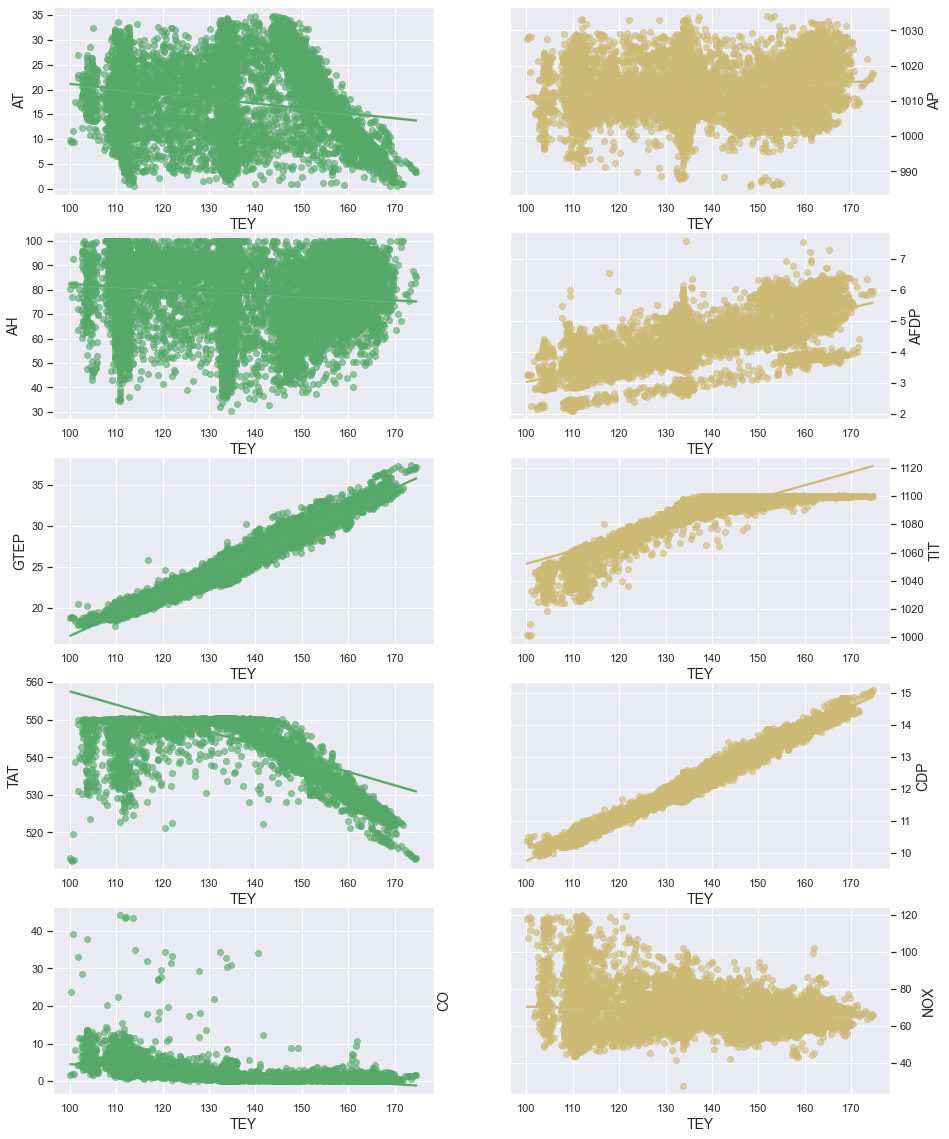

In [12]:
f, axes = plt.subplots(5,2, figsize=(15,20))

sns.regplot(x = 'TEY', y = 'AT', data = data, ax = axes[0,0], color = 'g', scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('TEY', fontsize = 14)
axes[0,0].set_ylabel('AT', fontsize=14)
axes[0,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AP', data = data, ax = axes[0,1], color = 'y',scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('TEY', fontsize = 14)
axes[0,1].set_ylabel('AP', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'AH', data = data, ax = axes[1,0], color = 'g',scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('TEY', fontsize = 14)
axes[1,0].set_ylabel('AH', fontsize=14)
axes[1,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'AFDP', data = data, ax = axes[1,1], color = 'y',scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('TEY', fontsize = 14)
axes[1,1].set_ylabel('AFDP', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'GTEP', data = data, ax = axes[2,0], color = 'g',scatter_kws={'alpha':0.6})
axes[2,0].set_xlabel('TEY', fontsize = 14)
axes[2,0].set_ylabel('GTEP', fontsize=14)
axes[2,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'TIT', data = data, ax = axes[2,1], color = 'y',scatter_kws={'alpha':0.6})
axes[2,1].set_xlabel('TEY', fontsize = 14)
axes[2,1].set_ylabel('TIT', fontsize=14)
axes[2,1].yaxis.set_label_position("right")
axes[2,1].yaxis.tick_right()


sns.regplot(x = 'TEY', y = 'TAT', data = data, ax = axes[3,0], color = 'g',scatter_kws={'alpha':0.6})
axes[3,0].set_xlabel('TEY', fontsize = 14)
axes[3,0].set_ylabel('TAT', fontsize=14)
axes[3,0].yaxis.tick_left()


sns.regplot(x = 'TEY', y = 'CDP', data = data, ax = axes[3,1], color = 'y',scatter_kws={'alpha':0.6})
axes[3,1].set_xlabel('TEY', fontsize = 14)
axes[3,1].set_ylabel('CDP', fontsize=14)
axes[3,1].yaxis.set_label_position("right")
axes[3,1].yaxis.tick_right()

sns.regplot(x = 'TEY', y = 'CO', data = data, ax = axes[4,0], color = 'g',scatter_kws={'alpha':0.6})
axes[4,0].set_xlabel('TEY', fontsize = 14)
axes[4,0].set_ylabel('CO', fontsize=14)
axes[4,0].yaxis.set_label_position("right")
axes[4,0].yaxis.tick_left()

sns.regplot(x = 'TEY', y = 'NOX', data = data, ax = axes[4,1], color = 'y',scatter_kws={'alpha':0.6})
axes[4,1].set_xlabel('TEY', fontsize = 14)
axes[4,1].set_ylabel('NOX', fontsize=14)
axes[4,1].yaxis.set_label_position("right")
axes[4,1].yaxis.tick_right()

plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [17]:
data_1 = data.copy()

In [18]:
X = data_1.drop('TEY',axis=1)
y = data_1['TEY']

In [19]:
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

Feature 0: 0.403527
Feature 1: 0.146836
Feature 2: 0.091331
Feature 3: 0.656779
Feature 4: 1.590875
Feature 5: 1.303977
Feature 6: 0.913488
Feature 7: 1.712343
Feature 8: 0.506516
Feature 9: 0.303305


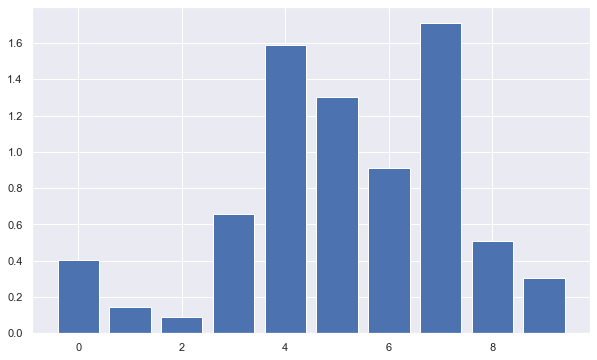

In [21]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [22]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)

In [28]:
y = data['TEY']

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [30]:
scaler.fit(X)

StandardScaler()

In [31]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0]

In [32]:
y

array([-1.23117246, -1.22990897, -1.23054071, ..., -1.5160891 ,
       -1.48134317, -1.42827666])

In [34]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head.head()

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985


In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [37]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((10527, 5), (4512, 5), (10527,), (4512,))

## Backpropagation

In [38]:
from keras.models import Sequential
from keras.layers import Dense

In [39]:
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [40]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [46]:
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 1s 2ms/step - loss: 0.9935 - mse: 0.9935
Epoch 2/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9932 - mse: 0.9932
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9939 - mse: 0.9939
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9936 - mse: 0.9936
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9932 - mse: 0.9932
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9932 - mse: 0.9932
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9938 - mse: 0.9938
Epoch 8/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9937 - mse: 0.9937
Epoch 9/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9934 - mse: 0.9934
Epoch 10/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9932 - mse: 0.9932
Epoch 11/100
264/264 [=================

264/264 [==============================] - 0s 1ms/step - loss: 0.9931 - mse: 0.9931
Epoch 86/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9930 - mse: 0.9930
Epoch 87/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9929 - mse: 0.9929
Epoch 88/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9934 - mse: 0.9934
Epoch 89/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9936 - mse: 0.9936
Epoch 90/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9938 - mse: 0.9938
Epoch 91/100
264/264 [==============================] - 0s 2ms/step - loss: 0.9935 - mse: 0.9935
Epoch 92/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9934 - mse: 0.9934
Epoch 93/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9933 - mse: 0.9933
Epoch 94/100
264/264 [==============================] - 0s 1ms/step - loss: 0.9939 - mse: 0.9939
Epoch 95/100
264/264 [=====================

In [47]:
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 0s 1ms/step - loss: 1.0167 - mse: 1.0167
mse


## Hyperparameters Tunning

In [48]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [51]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = data['TEY'] 

In [52]:
X_500 = X.iloc[0:500,:]

In [54]:
X_500.head()

,AFDP,GTEP,TIT,TAT,CDP
0,3.5000,19.663,1059.2,550.00,10.605
1,3.4998,19.728,1059.3,550.00,10.598
2,3.4824,19.779,1059.4,549.87,10.601
3,3.4805,19.792,1059.6,549.99,10.606
4,3.4976,19.765,1059.7,549.98,10.612


In [55]:
y_500 = y.iloc[0:500] 

In [56]:
y_500.head()

0    114.70
1    114.72
2    114.71
3    114.72
4    114.72
Name: TEY, dtype: float64

In [59]:
scaler.fit(X)
y_500 = StandardScaler().fit_transform(y_500.values.reshape(len(y_500),1))[:,0]

In [61]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head.head()

,AFDP,GTEP,TIT,TAT,CDP
0,-0.921232,-1.379101,-1.488376,0.585240,-1.357331
1,-0.921495,-1.363528,-1.482325,0.585240,-1.363676
2,-0.944385,-1.351309,-1.476275,0.568715,-1.360957
3,-0.946884,-1.348194,-1.464173,0.583969,-1.356424
4,-0.924389,-1.354663,-1.458123,0.582698,-1.350985


In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_500, y_500, test_size=0.3, random_state=1)

In [63]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((350, 5), (150, 5), (350,), (150,))

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model

In [66]:
model = KerasClassifier(build_fn = create_model,verbose = 0)

In [67]:
#grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

In [68]:
param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

In [69]:
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.513 total time=   2.1s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.202 total time=   1.6s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, ne

[CV 1/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.513 total time=   1.4s
[CV 2/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.202 total time=   1.4s
[CV 3/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 5/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.431 total time=   1.3s
[CV 4/5; 5/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 5/256] END activati

[CV 2/5; 10/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.202 total time=   1.5s
[CV 3/5; 10/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 10/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.431 total time=   1.4s
[CV 4/5; 10/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 10/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.689 total time=   1.4s
[CV 5/5; 10/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 10/256] END a

[CV 3/5; 15/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.431 total time=   1.4s
[CV 4/5; 15/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 15/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.689 total time=   1.3s
[CV 5/5; 15/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 15/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.112 total time=   1.4s
[CV 1/5; 16/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 16/256] END activat

[CV 3/5; 20/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.431 total time=   2.2s
[CV 4/5; 20/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 20/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.689 total time=   2.1s
[CV 5/5; 20/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 20/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.112 total time=   2.3s
[CV 1/5; 21/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 21

[CV 3/5; 25/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.431 total time=   1.9s
[CV 4/5; 25/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 25/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.689 total time=   2.4s
[CV 5/5; 25/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 25/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.112 total time=   2.0s
[CV 1/5; 26/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 26/256]

[CV 4/5; 30/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.689 total time=   2.1s
[CV 5/5; 30/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 30/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.112 total time=   2.1s
[CV 1/5; 31/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 31/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.513 total time=   1.9s
[CV 2/5; 31/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 31/256] END a

[CV 5/5; 35/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.112 total time=   1.4s
[CV 1/5; 36/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.513 total time=   1.3s
[CV 2/5; 36/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 36/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.202 total time=   1.5s
[CV 3/5; 36/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 36/256]

[CV 1/5; 41/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.513 total time=   1.4s
[CV 2/5; 41/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 41/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.202 total time=   1.3s
[CV 3/5; 41/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 41/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.431 total time=   1.4s
[CV 4/5; 41/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 41/256] END a

[CV 2/5; 46/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.202 total time=   1.4s
[CV 3/5; 46/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 46/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.431 total time=   1.3s
[CV 4/5; 46/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 46/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.689 total time=   1.7s
[CV 5/5; 46/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 46/256] END activat

[CV 3/5; 51/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.431 total time=   2.4s
[CV 4/5; 51/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 51/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.689 total time=   2.2s
[CV 5/5; 51/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 51/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.112 total time=   2.2s
[CV 1/5; 52/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 5

[CV 3/5; 56/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.431 total time=   2.0s
[CV 4/5; 56/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 56/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.689 total time=   2.1s
[CV 5/5; 56/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 56/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.112 total time=   2.2s
[CV 1/5; 57/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 57/256]

[CV 3/5; 61/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.431 total time=   2.1s
[CV 4/5; 61/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 61/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.689 total time=   2.0s
[CV 5/5; 61/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 61/256] END activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.112 total time=   2.2s
[CV 1/5; 62/256] START activation_function=relu, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 62/256] END a

[CV 4/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.689 total time=   1.3s
[CV 5/5; 66/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 66/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.112 total time=   1.0s
[CV 1/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 67/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.513 total time=   1.2s
[CV 2/5; 67/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 67/256]

[CV 5/5; 71/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.112 total time=   1.1s
[CV 1/5; 72/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 72/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.513 total time=   1.1s
[CV 2/5; 72/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 72/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.202 total time=   1.1s
[CV 3/5; 72/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 72/256] END a

[CV 1/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.513 total time=   1.1s
[CV 2/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.202 total time=   1.4s
[CV 3/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 77/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.431 total time=   1.1s
[CV 4/5; 77/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 77/256] END activat

[CV 2/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.202 total time=   1.4s
[CV 3/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.431 total time=   1.3s
[CV 4/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 82/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.689 total time=   1.4s
[CV 5/5; 82/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 8

[CV 2/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.202 total time=   1.5s
[CV 3/5; 87/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.431 total time=   1.5s
[CV 4/5; 87/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 87/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.689 total time=   1.5s
[CV 5/5; 87/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 87/256]

[CV 2/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.202 total time=   1.4s
[CV 3/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.431 total time=   1.4s
[CV 4/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 92/256] END activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.689 total time=   1.8s
[CV 5/5; 92/256] START activation_function=relu, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 92/256]

[CV 3/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.431 total time=   1.1s
[CV 4/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.689 total time=   1.1s
[CV 5/5; 97/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 97/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.112 total time=   1.1s
[CV 1/5; 98/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 98/256]

[CV 3/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.431 total time=   1.1s
[CV 4/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.689 total time=   1.0s
[CV 5/5; 102/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 102/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.112 total time=   1.0s
[CV 1/5; 103/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 103/256

[CV 3/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.431 total time=   1.1s
[CV 4/5; 107/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.689 total time=   1.0s
[CV 5/5; 107/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 107/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.112 total time=   1.5s
[CV 1/5; 108/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 108/256

[CV 4/5; 112/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.689 total time=   1.2s
[CV 5/5; 112/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 112/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.112 total time=   1.1s
[CV 1/5; 113/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 113/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.513 total time=   1.6s
[CV 2/5; 113/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 113/

[CV 4/5; 117/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.689 total time=   1.4s
[CV 5/5; 117/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 117/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.112 total time=   1.5s
[CV 1/5; 118/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 118/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.513 total time=   1.5s
[CV 2/5; 118/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 1

[CV 4/5; 122/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.689 total time=   1.5s
[CV 5/5; 122/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 122/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.112 total time=   1.5s
[CV 1/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 123/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.513 total time=   1.8s
[CV 2/5; 123/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 1

[CV 4/5; 127/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.689 total time=   1.5s
[CV 5/5; 127/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 127/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.112 total time=   1.8s
[CV 1/5; 128/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 128/256] END activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.513 total time=   1.5s
[CV 2/5; 128/256] START activation_function=relu, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 128/256

[CV 4/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.689 total time=   1.6s
[CV 5/5; 132/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 132/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.112 total time=   1.4s
[CV 1/5; 133/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 133/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.513 total time=   1.4s
[CV 2/5; 133/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[

[CV 4/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.689 total time=   1.4s
[CV 5/5; 137/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 137/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.112 total time=   1.4s
[CV 1/5; 138/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 138/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.513 total time=   1.4s
[CV 2/5; 138/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 

[CV 4/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.689 total time=   1.4s
[CV 5/5; 142/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 142/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.112 total time=   1.4s
[CV 1/5; 143/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 143/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.513 total time=   1.4s
[CV 2/5; 143/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 1

[CV 4/5; 147/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.690 total time=   2.8s
[CV 5/5; 147/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 147/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.112 total time=   2.2s
[CV 1/5; 148/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 148/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.513 total time=   1.9s
[CV 2/5; 148/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, ne

[CV 4/5; 152/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.689 total time=   2.2s
[CV 5/5; 152/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 152/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.112 total time=   2.4s
[CV 1/5; 153/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 153/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.513 total time=   2.2s
[CV 2/5; 153/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=

[CV 4/5; 157/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.689 total time=   2.4s
[CV 5/5; 157/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 157/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.112 total time=   1.9s
[CV 1/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 158/256] END activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.513 total time=   1.9s
[CV 2/5; 158/256] START activation_function=linear, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 

[CV 4/5; 162/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.689 total time=   1.5s
[CV 5/5; 162/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 162/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.112 total time=   1.4s
[CV 1/5; 163/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 163/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.513 total time=   1.4s
[CV 2/5; 163/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=

[CV 4/5; 167/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.689 total time=   1.3s
[CV 5/5; 167/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 167/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.112 total time=   1.4s
[CV 1/5; 168/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 168/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.514 total time=   1.3s
[CV 2/5; 168/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 

[CV 4/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.689 total time=   1.2s
[CV 5/5; 172/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 172/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.112 total time=   1.2s
[CV 1/5; 173/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 173/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.513 total time=   1.2s
[CV 2/5; 173/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5

[CV 4/5; 177/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.689 total time=   1.8s
[CV 5/5; 177/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 177/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.112 total time=   1.8s
[CV 1/5; 178/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 178/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.513 total time=   2.3s
[CV 2/5; 178/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, ne

[CV 4/5; 182/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.689 total time=   1.8s
[CV 5/5; 182/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 182/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.112 total time=   2.2s
[CV 1/5; 183/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 183/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.513 total time=   2.0s
[CV 2/5; 183/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=

[CV 4/5; 187/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.689 total time=   2.1s
[CV 5/5; 187/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 187/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.112 total time=   1.9s
[CV 1/5; 188/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 188/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.513 total time=   2.0s
[CV 2/5; 188/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=

[CV 4/5; 192/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.689 total time=   2.1s
[CV 5/5; 192/256] START activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 192/256] END activation_function=linear, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.112 total time=   1.9s
[CV 1/5; 193/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 193/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.513 total time=   1.0s
[CV 2/5; 193/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[

[CV 4/5; 197/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.689 total time=   1.0s
[CV 5/5; 197/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 197/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.112 total time=   1.0s
[CV 1/5; 198/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 198/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.513 total time=   1.0s
[CV 2/5; 198/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 

[CV 4/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.689 total time=   1.0s
[CV 5/5; 202/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 202/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-5.112 total time=   0.9s
[CV 1/5; 203/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 203/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.513 total time=   1.2s
[CV 2/5; 203/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 

[CV 4/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.689 total time=   1.0s
[CV 5/5; 207/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 207/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-5.112 total time=   1.2s
[CV 1/5; 208/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 208/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.513 total time=   1.0s
[CV 2/5; 208/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 2

[CV 4/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.689 total time=   1.5s
[CV 5/5; 212/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 212/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-5.112 total time=   1.3s
[CV 1/5; 213/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 213/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.513 total time=   1.4s
[CV 2/5; 213/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuro

[CV 4/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.689 total time=   1.3s
[CV 5/5; 217/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 217/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-5.112 total time=   1.3s
[CV 1/5; 218/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 218/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4;, score=-4.513 total time=   1.3s
[CV 2/5; 218/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=

[CV 4/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.689 total time=   1.3s
[CV 5/5; 222/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 222/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-5.112 total time=   1.4s
[CV 1/5; 223/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 223/256] END activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2;, score=-4.513 total time=   1.3s
[CV 2/5; 223/256] START activation_function=linear, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 

[CV 4/5; 227/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-4.689 total time=   1.0s
[CV 5/5; 227/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 227/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2;, score=-5.112 total time=   0.9s
[CV 1/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 228/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4;, score=-4.514 total time=   1.0s
[CV 2/5; 228/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=

[CV 4/5; 232/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-4.689 total time=   1.0s
[CV 5/5; 232/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 232/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4;, score=-5.112 total time=   0.9s
[CV 1/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 233/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2;, score=-4.513 total time=   1.3s
[CV 2/5; 233/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 

[CV 4/5; 237/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-4.689 total time=   0.9s
[CV 5/5; 237/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 237/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2;, score=-5.112 total time=   1.2s
[CV 1/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 238/256] END activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4;, score=-4.513 total time=   1.0s
[CV 2/5; 238/256] START activation_function=linear, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 2

KeyboardInterrupt: 

In [70]:
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'linear'))
    
adam=adam_v2.Adam(learning_rate = 0.01)

In [71]:
final_model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])

In [72]:
final_model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
18/18 [==============================] - 1s 2ms/step - loss: 1.0050 - mse: 1.0050
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9997 - mse: 0.9997
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9997 - mse: 0.9997
Epoch 4/50
18/18 [==============================] - 0s 3ms/step - loss: 0.9999 - mse: 0.9999
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9996 - mse: 0.9996
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 1.0003 - mse: 1.0003
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9992 - mse: 0.9992
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 1.0018 - mse: 1.0018
Epoch 9/50
18/18 [==============================] - 0s 2ms/step - loss: 0.9991 - mse: 0.9991
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 1.0013 - mse: 1.0013
Epoch 11/50
18/18 [==============================] - 0s 2ms/step - lo

In [73]:
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

5/5 [==============================] - 0s 2ms/step - loss: 1.0045 - mse: 1.0045
mse
